# Import packages

In [1]:
import os
import warnings
import math
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix , roc_curve, auc, roc_curve,accuracy_score #,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
import seaborn as sns


# Read training and test data

In [2]:
test_data = pd.read_csv('/home/sagarika/belgrade/astrobio/Exoplanet-exploration/exoTest.csv')
train_data = pd.read_csv('/home/sagarika/belgrade/astrobio/Exoplanet-exploration/exoTrain.csv')

In [3]:
train_data

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


# LABEL -> 2 is an exoplanet star and 1 is a non-exoplanet-star.
# FLUX1-FLUX3197 -> the light intensity recorded for each star, at a different point in time.

# Both the test data and the training data has labels from before that classify them as systems with and without exoplanets

In [4]:
#train_data.iloc[0,:][1]  #Describes per system

In [5]:
#train_data[:1]

In [6]:
#test_data

# Chainging to binary labels. Below we label 1 as exoplanet and 0 as syatems with no exoplanets

In [7]:
categ = {2: 1,1: 0}
train_data.LABEL = [categ[item] for item in train_data.LABEL]
test_data.LABEL = [categ[item] for item in test_data.LABEL]

In [8]:
train_data.describe()   

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,0.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,0.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,0.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,0.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,0.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,1.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [9]:
train_data['LABEL'].value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

In [10]:
test_data['LABEL'].value_counts()

0    565
1      5
Name: LABEL, dtype: int64

# What we see is that both test and training data set is highlt imbalanced

In [11]:
#sns.heatmap(train_data.isnull())

<Axes: xlabel='LABEL', ylabel='FLUX.5'>

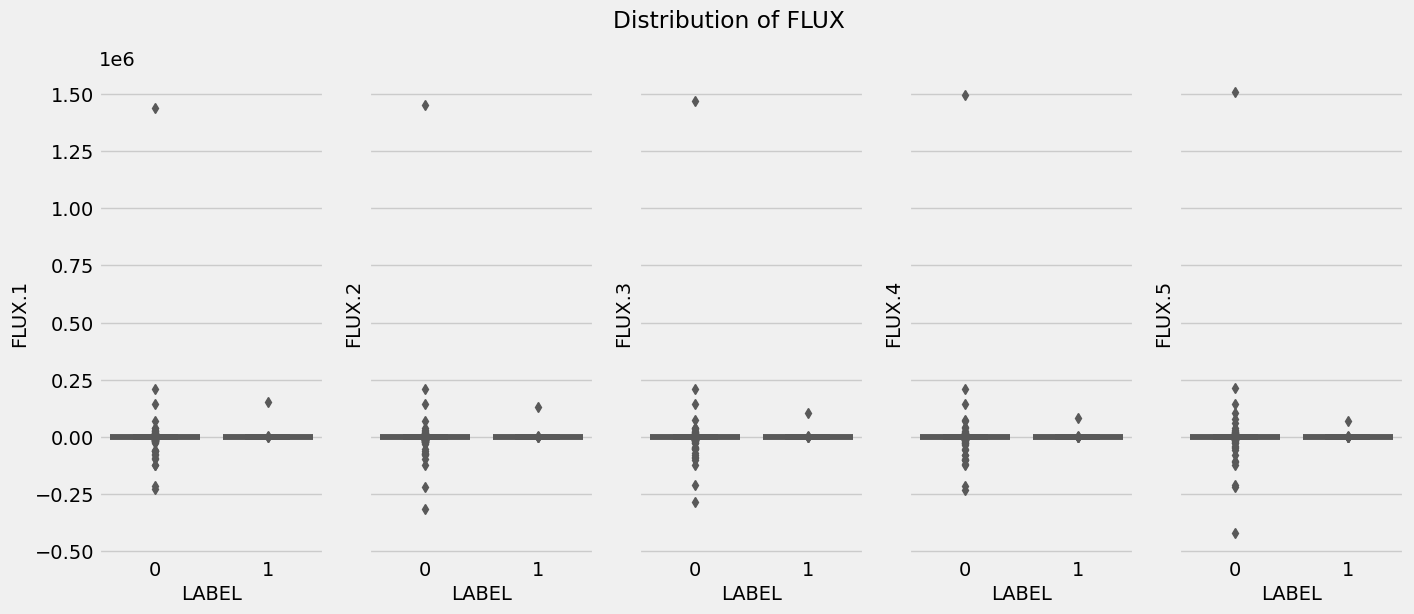

In [12]:
#Detecting outliers based on Boxplot

fig, axes = plt.subplots(1, 5,figsize=(15, 6), sharey=True)
fig.suptitle('Distribution of FLUX')

sns.boxplot(ax=axes[0], data=train_data, x='LABEL', y='FLUX.1',palette="Set2")
sns.boxplot(ax=axes[1], data=train_data, x='LABEL', y='FLUX.2',palette="Set2")
sns.boxplot(ax=axes[2], data=train_data, x='LABEL', y='FLUX.3',palette="Set2")
sns.boxplot(ax=axes[3], data=train_data, x='LABEL', y='FLUX.4',palette="Set2")
sns.boxplot(ax=axes[4], data=train_data, x='LABEL', y='FLUX.5',palette="Set2")


In [13]:
np.shape(train_data)

(5087, 3198)

In [14]:
#I can also drop flux points/data points based on 3 sigma values.
train_data = train_data[(np.abs(ndimage.filters.gaussian_filter1d(train_data.iloc[:,1], 3)) < 3*train_data.iloc[:,1].std())]


In [15]:
np.shape(train_data)

(5078, 3198)

In [16]:
#This filter removes 9 systems

#We do the same filtering for the test set

test_data = test_data[(np.abs(ndimage.filters.gaussian_filter1d(test_data.iloc[:,1], 3)) < 3*test_data.iloc[:,1].std())]

In [17]:
np.shape(test_data)

(569, 3198)

In [18]:
#This removes 1 system

In [19]:
x_train = train_data.drop(["LABEL"],axis=1) # dropping the exoplanet or not exoplanet column
y_train = train_data["LABEL"]               #Storing the label here
x_test = test_data.drop(["LABEL"],axis=1)
y_test = test_data["LABEL"]

In [20]:
np.shape(x_test)

(569, 3197)

# Balancing the  training set using SMOTE

<Axes: xlabel='index'>

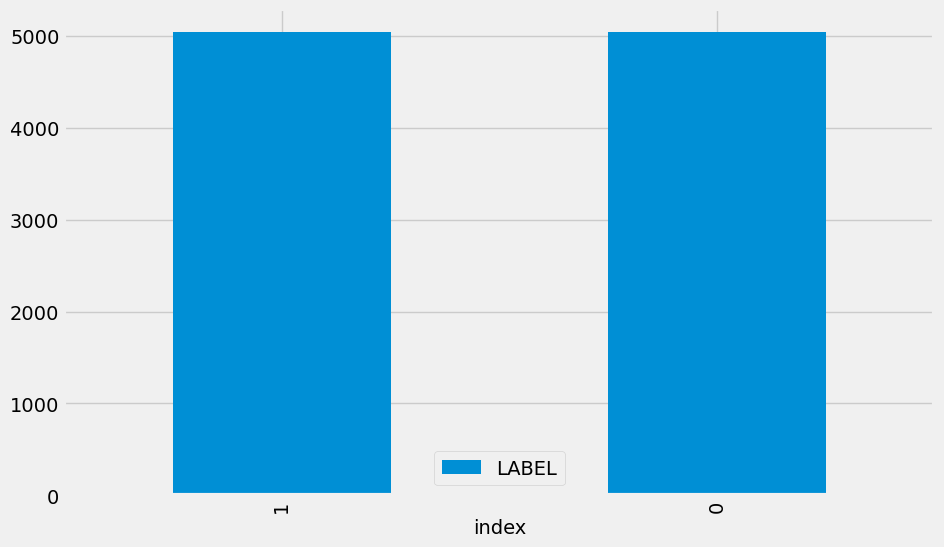

In [21]:
from imblearn.over_sampling import SMOTE
model = SMOTE(k_neighbors=3)
ov_train_x,ov_train_y = model.fit_resample(train_data.drop('LABEL',axis=1), train_data['LABEL']) 
#oversample the minority class in the training data

#the initial command was model.fit_sample but that was giving an error 'SMOTE' object has no attribute 'fit_sample'
#changing it to model.fit_resample works

ov_train_y = ov_train_y.astype('int')

ov_train_y.value_counts().reset_index().plot(kind='bar', x='index', y='LABEL')


# Balancing the test data using SMOTE as well

<Axes: xlabel='index'>

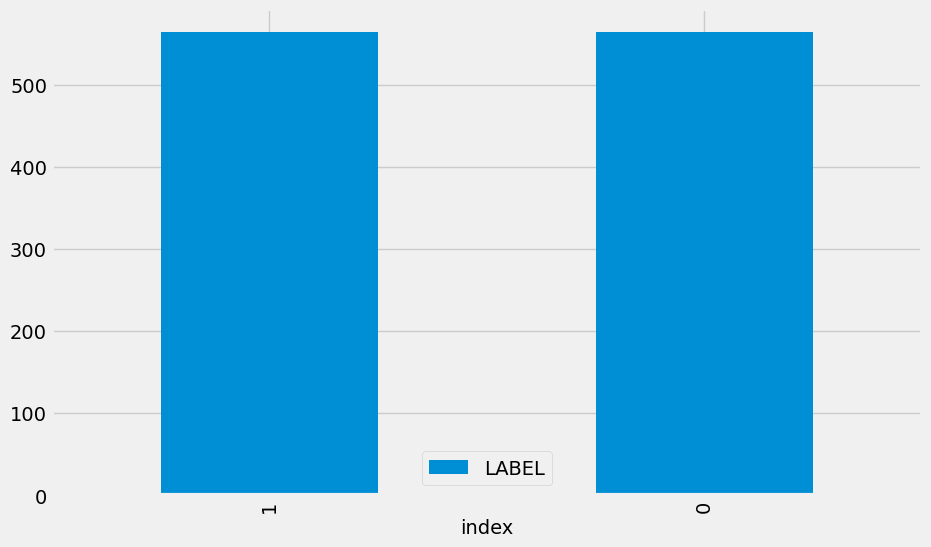

In [22]:
from imblearn.over_sampling import SMOTE
model = SMOTE(k_neighbors=3)
ov_test_x,ov_test_y = model.fit_resample(test_data.drop('LABEL',axis=1), test_data['LABEL']) 
#oversample the minority class in the training data

#the initial command was model.fit_sample but that was giving an error 'SMOTE' object has no attribute 'fit_sample'
#changing it to model.fit_resample works

ov_test_y = ov_test_y.astype('int')

ov_test_y.value_counts().reset_index().plot(kind='bar', x='index', y='LABEL')




# Here for using SMOTE on the test set I had to change k_neighbour to 3
# SMOTE works on KNN model. In my test data, number of exoplanets is just 5
# So the KNN model will not work till neighbours <= sample. 

# Since i changed it here, I made the same changes while oversampling the training set as well.

# Split the  oversampled training data to create a new test and training set

In [23]:
train_X, test_X, train_y, test_y = train_test_split(ov_train_x, ov_train_y, test_size=0.33, random_state=42)

# Decision Tree

We build and train a Decision Treee classifier. We train it on the training data we created from the oversampled traiing set and use it on the test data created from the oversampled training set.

# Decision Tree

### Now I am training the model based on the training data that was created by spliting the training set.
### But I am using it to test the oversampled test data

Validation accuracy of Decision Tree is 0.5735815602836879

Classification report :
               precision    recall  f1-score   support

           0       0.54      0.93      0.68       564
           1       0.75      0.22      0.34       564

    accuracy                           0.57      1128
   macro avg       0.65      0.57      0.51      1128
weighted avg       0.65      0.57      0.51      1128



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

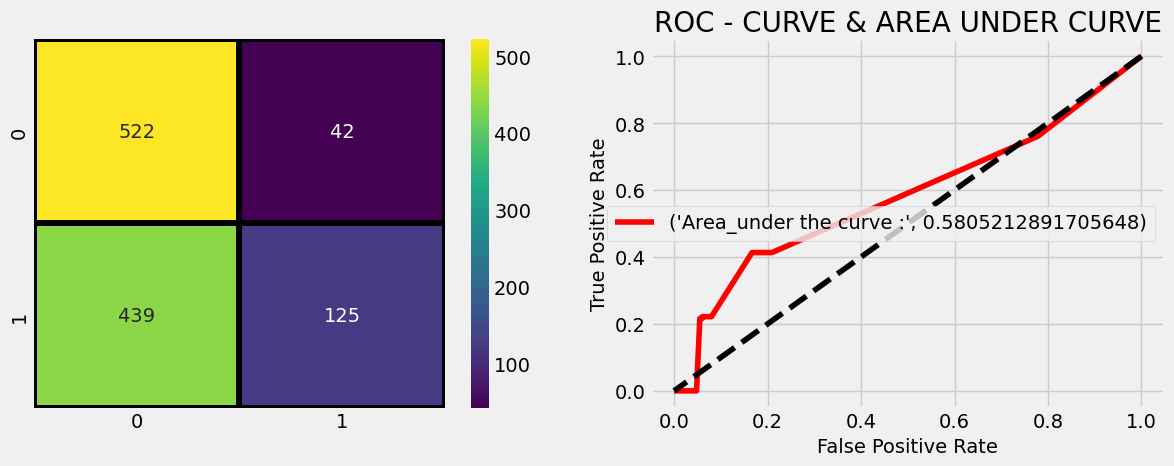

In [24]:
from sklearn.tree import DecisionTreeClassifier
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)

ds_model.fit(train_X,train_y)

# Make predictions on the unseen data using the trained model
predictions = ds_model.predict(ov_test_x)

# Evaluate the predictions

print('Validation accuracy of Decision Tree is', accuracy_score(ov_test_y,predictions))
print ("\nClassification report :\n",(classification_report(ov_test_y,predictions)))


#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)

sns.heatmap(confusion_matrix(ov_test_y,predictions),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)


#ROC curve and Area under the curve plotting

predicting_probabilites = ds_model.predict_proba(ov_test_x)[:,1]  #delete later
fpr,tpr,thresholds = roc_curve(ov_test_y,predicting_probabilites)  #delete later

plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

### Now I am training the model based on the training data that was created by spliting the training set. But I am testing just on the original test data. No oversampling, no spliting

Validation accuracy of Decision Tree is 0.9209138840070299

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       564
           1       0.05      0.40      0.08         5

    accuracy                           0.92       569
   macro avg       0.52      0.66      0.52       569
weighted avg       0.99      0.92      0.95       569



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

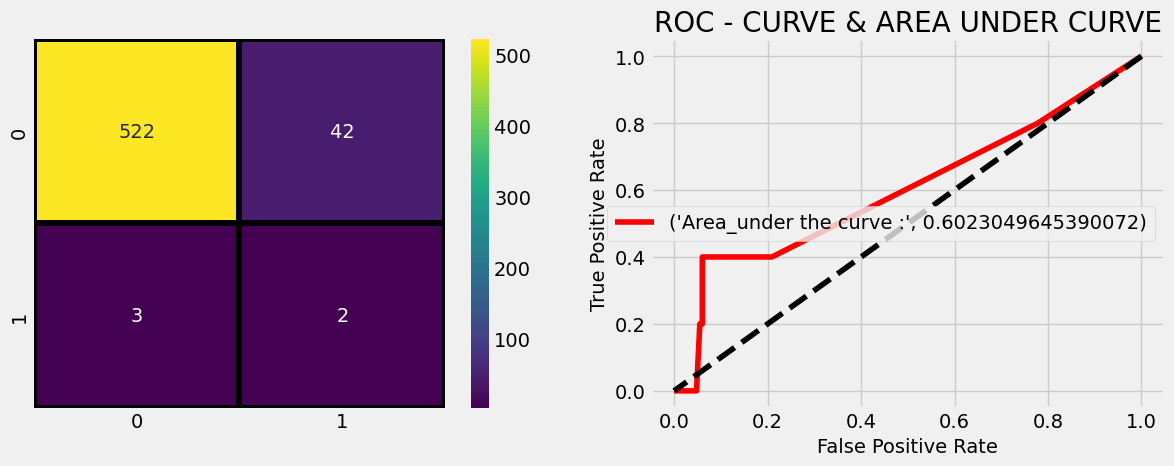

In [25]:
ds_model.fit(train_X,train_y)

# Make predictions on the unseen data using the trained model
predictions = ds_model.predict(x_test)

# Evaluate the predictions

print('Validation accuracy of Decision Tree is', accuracy_score(y_test,predictions))
print ("\nClassification report :\n",(classification_report(y_test,predictions)))


#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)

sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)


#ROC curve and Area under the curve plotting

predicting_probabilites = ds_model.predict_proba(x_test)[:,1]  #delete later
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)  #delete later

plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

### Now i will use just the oversampled training data and oversampled test data. 

Validation accuracy of Decision Tree is 0.5851063829787234

Classification report :
               precision    recall  f1-score   support

           0       0.55      0.93      0.69       564
           1       0.78      0.24      0.36       564

    accuracy                           0.59      1128
   macro avg       0.67      0.59      0.53      1128
weighted avg       0.67      0.59      0.53      1128



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

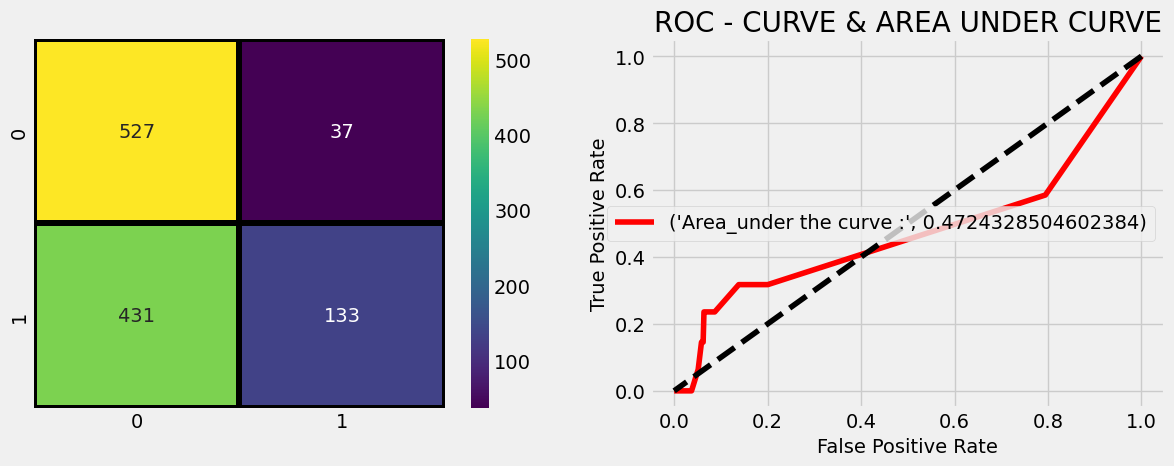

In [26]:
ds_model.fit(ov_train_x,ov_train_y)

# Make predictions on the unseen data using the trained model
predictions = ds_model.predict(ov_test_x)

# Evaluate the predictions

print('Validation accuracy of Decision Tree is', accuracy_score(ov_test_y,predictions))
print ("\nClassification report :\n",(classification_report(ov_test_y,predictions)))


#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)

sns.heatmap(confusion_matrix(ov_test_y,predictions),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)


#ROC curve and Area under the curve plotting

predicting_probabilites = ds_model.predict_proba(ov_test_x)[:,1]  #delete later
fpr,tpr,thresholds = roc_curve(ov_test_y,predicting_probabilites)  #delete later

plt.subplot(222) 
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

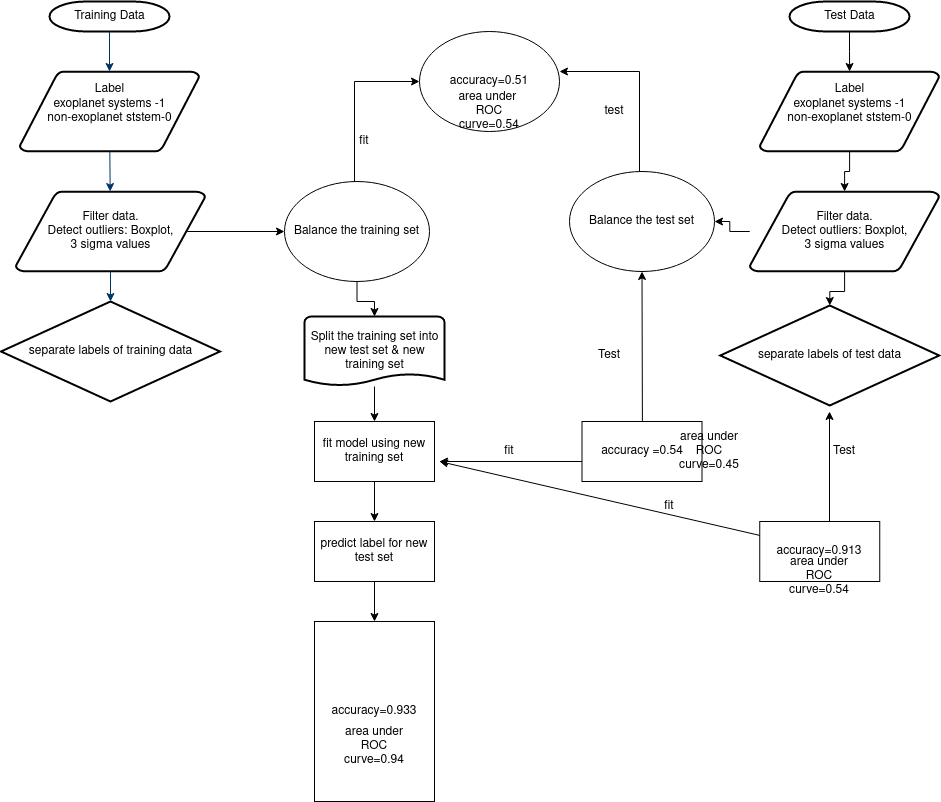

# K-NN

### Now I am training the model based on the training data that was created by spliting the training set.
### But I am using it to test the oversampled test data

Validation accuracy of Decision Tree is 0.6117021276595744

Classification report :
               precision    recall  f1-score   support

           0       0.56      0.98      0.72       564
           1       0.93      0.24      0.38       564

    accuracy                           0.61      1128
   macro avg       0.75      0.61      0.55      1128
weighted avg       0.75      0.61      0.55      1128



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

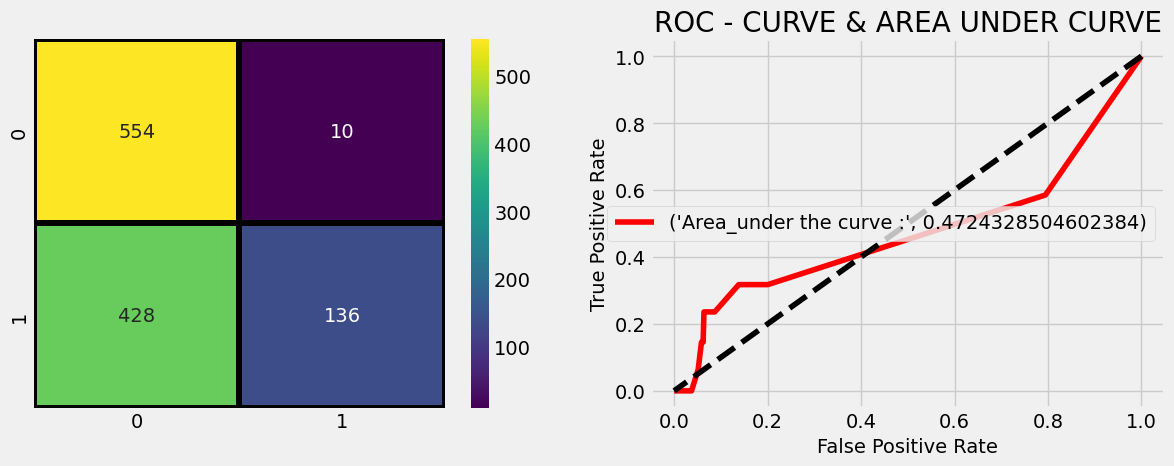

In [27]:
#K-NN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(train_X,train_y)

predictions=knn_model.predict(ov_test_x)

# Evaluate the predictions

print('Validation accuracy of Decision Tree is', accuracy_score(predictions,ov_test_y))
print ("\nClassification report :\n",(classification_report(ov_test_y,predictions)))


#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)

sns.heatmap(confusion_matrix(ov_test_y,predictions),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)


#ROC curve and Area under the curve plotting

predicting_probabilites = ds_model.predict_proba(ov_test_x)[:,1]  #delete later
fpr,tpr,thresholds = roc_curve(ov_test_y,predicting_probabilites)  #delete later

plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

### Now I am training the model based on the training data that was created by spliting the training set. But I am testing just on the original test data. No oversampling, no spliting

Validation accuracy of Decision Tree is 0.9771528998242531

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       564
           1       0.17      0.40      0.24         5

    accuracy                           0.98       569
   macro avg       0.58      0.69      0.61       569
weighted avg       0.99      0.98      0.98       569



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

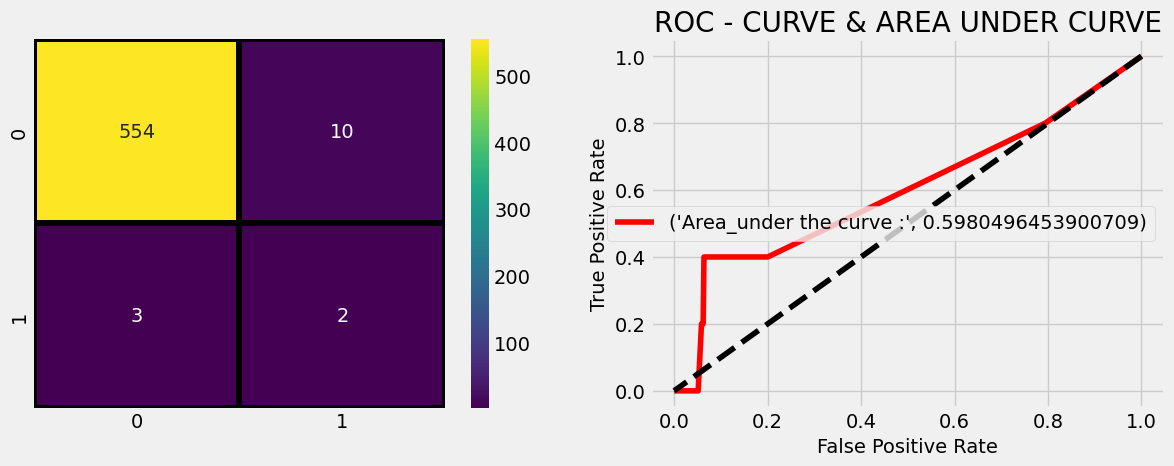

In [28]:
knn_model.fit(train_X,train_y)

# Make predictions on the unseen data using the trained model
predictions = knn_model.predict(x_test)

# Evaluate the predictions

print('Validation accuracy of Decision Tree is', accuracy_score(predictions,y_test))
print ("\nClassification report :\n",(classification_report(y_test,predictions)))


#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)

sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)


#ROC curve and Area under the curve plotting

predicting_probabilites = ds_model.predict_proba(x_test)[:,1]  #delete later
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)  #delete later

plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

### Now i will use just the oversampled training data and oversampled test data.

Validation accuracy of Decision Tree is 0.5930851063829787

Classification report :
               precision    recall  f1-score   support

           0       0.55      0.99      0.71       564
           1       0.96      0.20      0.32       564

    accuracy                           0.59      1128
   macro avg       0.75      0.59      0.52      1128
weighted avg       0.75      0.59      0.52      1128



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

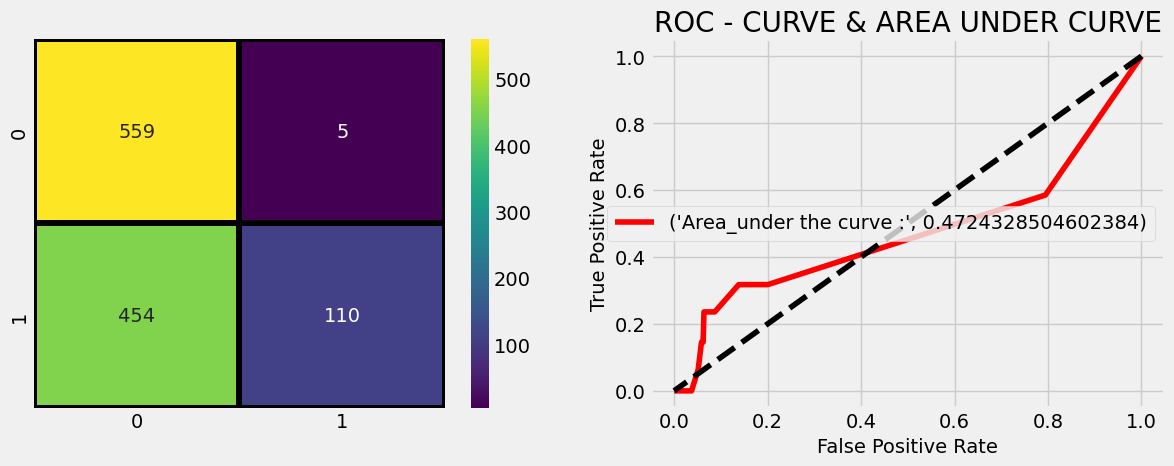

In [29]:
knn_model.fit(ov_train_x,ov_train_y)

# Make predictions on the unseen data using the trained model
predictions = knn_model.predict(ov_test_x)

# Evaluate the predictions

print('Validation accuracy of Decision Tree is', accuracy_score(predictions,ov_test_y))
print ("\nClassification report :\n",(classification_report(ov_test_y,predictions)))


#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)

sns.heatmap(confusion_matrix(ov_test_y,predictions),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)


#ROC curve and Area under the curve plotting

predicting_probabilites = ds_model.predict_proba(ov_test_x)[:,1]  #delete later
fpr,tpr,thresholds = roc_curve(ov_test_y,predicting_probabilites)  #delete later

plt.subplot(222) 
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)